<a href="https://colab.research.google.com/github/skyil7/SejongUniv_AI/blob/master/2.Gradient_Descent_By_Hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimizing Cost

## Imports

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [2]:
torch.manual_seed(1)

## Data
아래의 조건을 충족하는 Fake Data를 만들어 사용
$$ y(x) = 2x$$

In [0]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

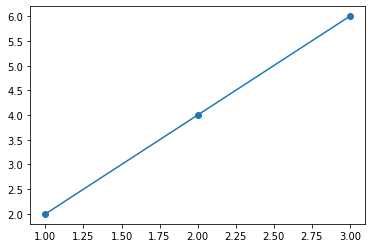

In [4]:
# Data
plt.scatter(x_train, y_train)
# Best-fit line
xs = np.linspace(1, 3, 1000)    # 1에서 3 사이를 1000으로 나눈 선형 증가 수열
plt.plot(xs, 2*xs)

## Cost by W
$$ H(x) = Wx$$
$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2$$

In [0]:
# -5와 7 사이를 1000 등분해서 w_list 생성
W_l = np.linspace(-5,7,1000)
# cost list
cost_l = []
for W in W_l:
    hypothesis = W * x_train
    cost = torch.mean((hypothesis - y_train) ** 2)
    cost_l.append(cost.item())

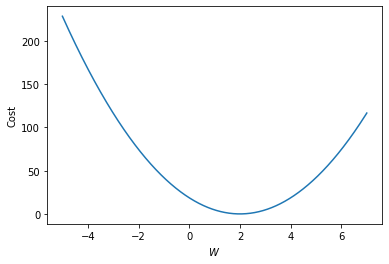

In [6]:
plt.plot(W_l, cost_l)
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()

In [7]:
print(W_l[np.argmin(cost_l)])

2.003003003003003


## Gradient Descent by Hand
$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2$$

$$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)} $$

In [0]:
W = 0

In [9]:
gradient = torch.sum((W * x_train - y_train) * x_train)
print(gradient)

tensor(-28.)


$$ W := W - \alpha \nabla W $$

In [10]:
lr = 0.1
W -= lr * gradient
print(W)

tensor(2.8000)


## Training

In [11]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1)
# learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost gradient로 H(x) 개선
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 18.666666
Epoch    1/10 W: 2.800, Cost: 2.986666
Epoch    2/10 W: 1.680, Cost: 0.477867
Epoch    3/10 W: 2.128, Cost: 0.076459
Epoch    4/10 W: 1.949, Cost: 0.012233
Epoch    5/10 W: 2.020, Cost: 0.001957
Epoch    6/10 W: 1.992, Cost: 0.000313
Epoch    7/10 W: 2.003, Cost: 0.000050
Epoch    8/10 W: 1.999, Cost: 0.000008
Epoch    9/10 W: 2.001, Cost: 0.000001
Epoch   10/10 W: 2.000, Cost: 0.000000
